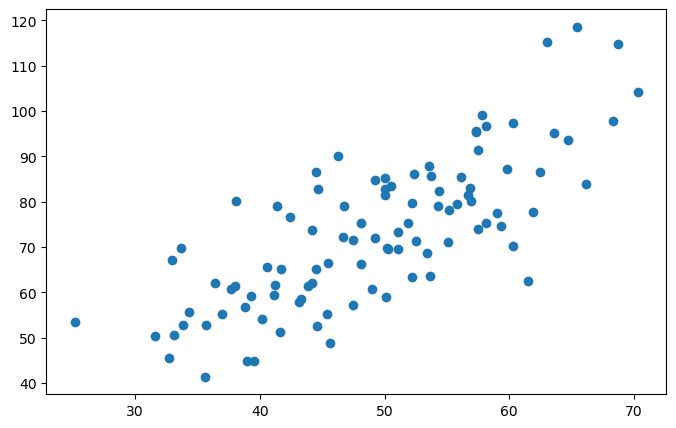

In [30]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 5.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [31]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753737


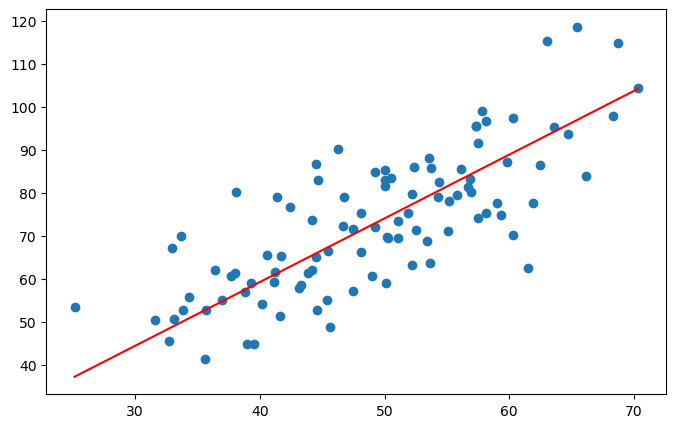

In [32]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

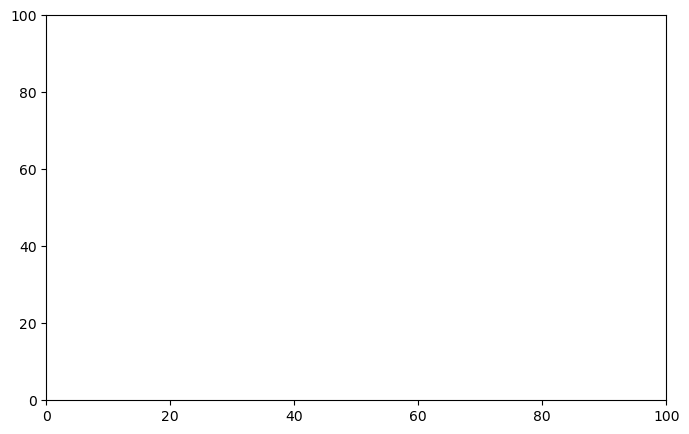

In [37]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axis objects
fig, ax = plt.subplots()

# Initialize empty lists for x and y
x = []
y = []

# Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Create an empty line object
line, = ax.plot([], [], color='green')

# Define the update function for the animation
def update(frame):
    x.append(frame)
    y.append(frame)
    
    # Update the line data
    line.set_data(x, y)
    
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(100), interval=50, blit=True)

# Display the animation
plt.show()


In [43]:
# Importing all necessary
import numpy as np
import gc
import os
import matplotlib.pyplot as plt

from matplotlib.animation import ArtistAnimation
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid
from IPython.display import Image, display, HTML

plt.style.use('bmh')

In [44]:
# Main function
def f(x):
    return x**2

# Derivative of function
def f_prime(x):
    return 2 * x


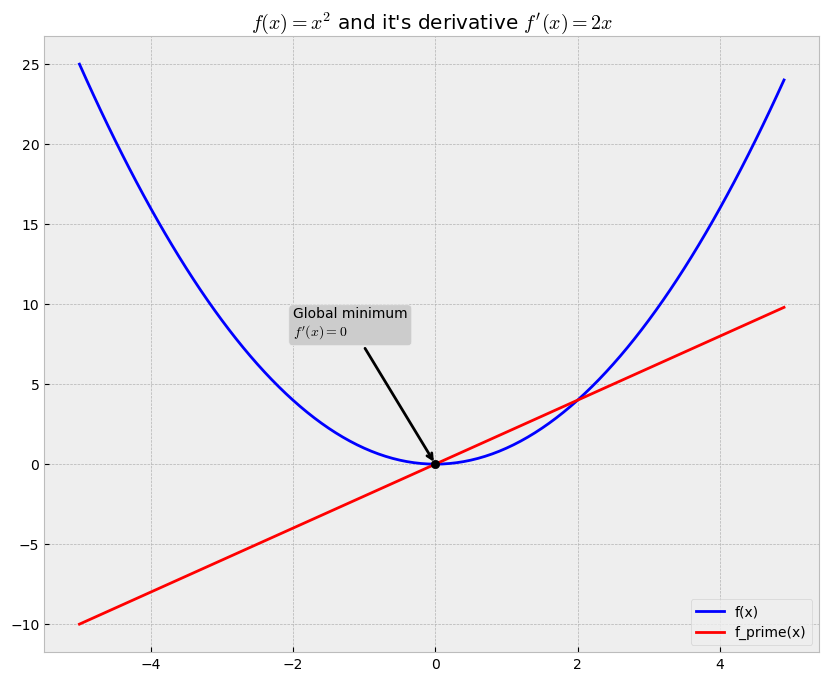

In [45]:
fig, ax = plt.subplots(figsize = (10, 8))

# Domain of function
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x), color = 'b', linewidth = 2, label = 'f(x)') # Plot the main function
plt.plot(x, f_prime(x), color = 'r', label = "f_prime(x)") # Plot the derivative of function
plt.scatter(0, 0, color = 'k', zorder = 2.5) # Global minimum of the function

# Annotations block
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle = '->', color = 'k', linewidth = 2)
ax.annotate('Global minimum\n$f\'(x)=0$', xy = (0, 0), xytext = (-2, 8), bbox = bbox_args, arrowprops=arrow_args)

plt.title("$f(x)=x^2$ and it's derivative $f'(x)=2x$")
plt.legend()
plt.show()

In [46]:
def gradient_descent(function, derivative, start_x = -4, x_domain = (-5, 5, 0.1), iterations = 1000, lr = 0.1, precision = 0.001, 
                     figsize = (10, 8), name = 'anim.gif', fps = 5):
    '''
    Creates an animation of gradient descent from specific point to the closest local minimum and saves it at the "name" name.
    function - described function, must be passed as function
    derivative - derivative of "function", must be passed as function
    start_x - starting X coordinate of point
    x_range - domain of function as tuple - (left_bound, right_bound, step)
    iterations - maximum number of iteration before stop
    lr - learning rate
    precision - desired precision of result, if step of gradient descent will be smalle than precision, then algorithm will stop
    figsize - size of a plot
    name - name of animation to save
    fps - fps of animation
    '''
    
    images = []    
    fig, ax = plt.subplots(figsize = figsize)
    x = np.arange(*x_domain)
    px = float(start_x) # Starting x coordinate

    # Function plot
    f = plt.plot(x, function(x), color = 'k')

    for frame in range(iterations):
        old_px = px # Saving old px value to calculate step

        # Plot point to track
        py = function(px) # Y coordinate of point    
        point = plt.scatter(px, py, color = 'r', zorder = 2.5)

        # Plot tangent line to the graph at (px, py) point
        slope = derivative(px)
        y_intercept = py - slope * px
        tx = np.arange(px - 1, px + 2, 2) # X coordinates of tangent line
        ty = slope * tx + y_intercept # Y coordinates of tangent line
        tangent = plt.plot(tx, ty, 'r--')    

        # Calculate new value of px
        px = px - lr * slope
        step = abs(old_px - px)

        # Plot text info
        bbox_args = dict(boxstyle="round", fc="0.8")
        arrow_args = dict(arrowstyle = '->', color = 'b', linewidth = 1)
        text = f'Iteration: {frame}\nPoint: ({px:.2f}, {py:.2f})\nSlope: {slope:.2f}\nStep: {step:.4f}'
        text = ax.annotate(text, xy = (px, py), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = bbox_args, arrowprops=arrow_args, fontsize = 12)

        plt.title('Gradient descent animation')    
        
        # Stopping algorithm if desired precision have been met
        if step <= precision:
            text2 = plt.text(0.7, 0.1, 'Local minimum found', fontsize = 12, transform = ax.transAxes)
            images.append([f[0], tangent[0], point, text, text2])
            break

        images.append([f[0], tangent[0], point, text])

    anim = ArtistAnimation(fig, images) 
    anim.save(name, writer = 'imagemagic', fps = fps)

MovieWriter imagemagic unavailable; using Pillow instead.


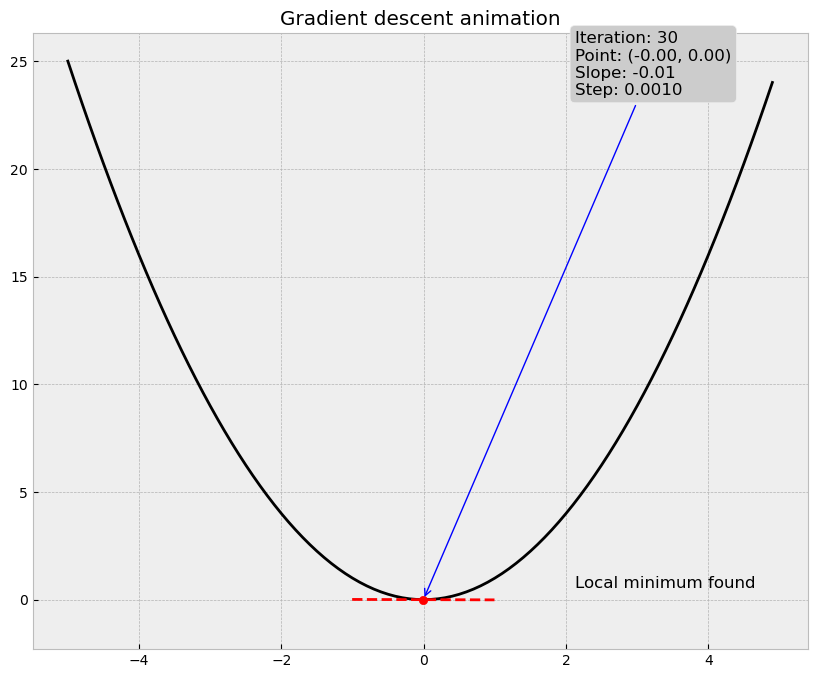

In [47]:
# Creating animation
gradient_descent(f, f_prime, start_x = -4, lr = 0.1, name = 'classic.gif')

In [48]:
# Displaying animation
HTML('<img src="./classic.gif" />')

MovieWriter imagemagic unavailable; using Pillow instead.


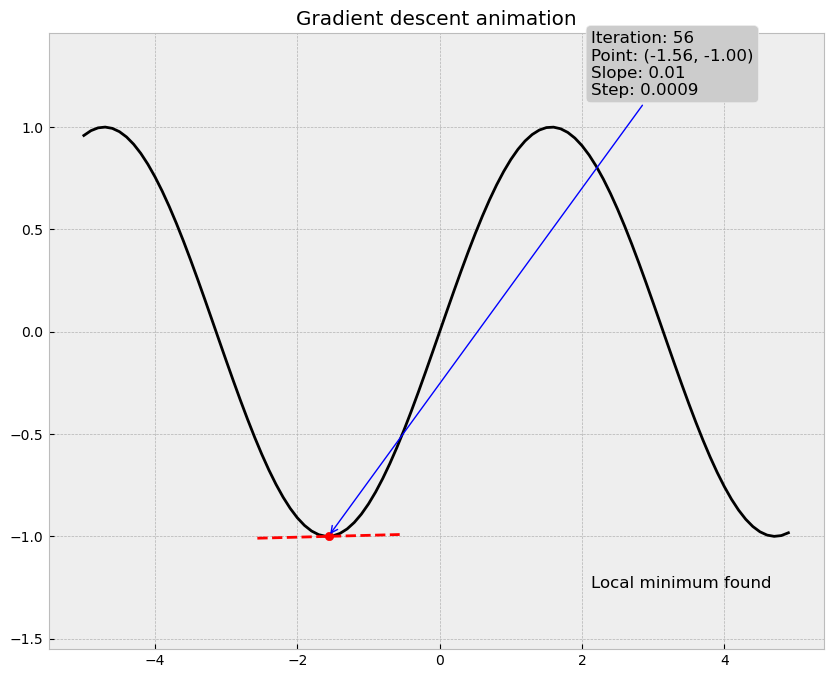

In [49]:
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

gradient_descent(f, f_prime, start_x = np.random.uniform(-5, 5), name = 'sin.gif')

In [50]:
HTML('<img src="./sin.gif" />')